In [1]:
import os, sys
# module_path = os.path.abspath(os.path.join('../../Prompt-based-class-incremental-learning-in-Federated-Learning/CODA_Prompt_CVPR2023_Code/'))
module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(module_path)
import torch, torchvision, numpy as np
from dataloaders import dataloader
from dataloaders.dataloader import iCIFAR100_Fed
import random

/home/grbagwe/miniconda3/envs/promptFCL/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
seed = 0
np.random.seed(seed)
torch.manual_seed(seed)
random.seed(seed)
torch.cuda.manual_seed(seed)

In [4]:
tasks = []
tasks_logits = []
p = 0
max_task = -1
other_split_size = 10 
first_split_size = 10 
num_classes = 100 
class_order = np.arange(num_classes).tolist()
class_order_logits = np.arange(num_classes).tolist()
rand_split = True

if seed > 0 and rand_split:
    print('=============================================')
    print('Shuffling....')
    print('pre-shuffle:' + str(class_order))
    random.seed(seed)
    random.shuffle(class_order)
    print('post-shuffle:' + str(class_order))
    print('=============================================')
            
            
while p < num_classes and (max_task == -1 or len(tasks) < max_task):
    inc = other_split_size if p > 0 else first_split_size
    tasks.append(class_order[p:p + inc])
    tasks_logits.append(class_order_logits[p:p + inc])
    p += inc
num_tasks = len(tasks)
task_names = [str(i + 1) for i in range(num_tasks)]


In [5]:
tasks

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
 [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
 [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
 [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
 [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
 [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
 [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
 [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]]

In [6]:
train_dataset = dataloader.iCIFAR100_Fed(root= "data", train = True,
                                         num_clients = 10,
                                         iid  = 0.5, 
                                        download_Flag = True,
                                        use_validation=False,
                                         tasks=tasks
                                        )
test_dataset = dataloader.iCIFAR100_Fed(root= "data", train = False,
                                         num_clients = 10,
                                         iid  = 0.5, 
                                        download_Flag = True,
                                        use_validation=False,
                                         tasks=tasks
                                        )

Files already downloaded and verified
Files already downloaded and verified


In [7]:
train_dataset.class_mapping

{-1: -1,
 0: 0,
 1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 6,
 7: 7,
 8: 8,
 9: 9,
 10: 10,
 11: 11,
 12: 12,
 13: 13,
 14: 14,
 15: 15,
 16: 16,
 17: 17,
 18: 18,
 19: 19,
 20: 20,
 21: 21,
 22: 22,
 23: 23,
 24: 24,
 25: 25,
 26: 26,
 27: 27,
 28: 28,
 29: 29,
 30: 30,
 31: 31,
 32: 32,
 33: 33,
 34: 34,
 35: 35,
 36: 36,
 37: 37,
 38: 38,
 39: 39,
 40: 40,
 41: 41,
 42: 42,
 43: 43,
 44: 44,
 45: 45,
 46: 46,
 47: 47,
 48: 48,
 49: 49,
 50: 50,
 51: 51,
 52: 52,
 53: 53,
 54: 54,
 55: 55,
 56: 56,
 57: 57,
 58: 58,
 59: 59,
 60: 60,
 61: 61,
 62: 62,
 63: 63,
 64: 64,
 65: 65,
 66: 66,
 67: 67,
 68: 68,
 69: 69,
 70: 70,
 71: 71,
 72: 72,
 73: 73,
 74: 74,
 75: 75,
 76: 76,
 77: 77,
 78: 78,
 79: 79,
 80: 80,
 81: 81,
 82: 82,
 83: 83,
 84: 84,
 85: 85,
 86: 86,
 87: 87,
 88: 88,
 89: 89,
 90: 90,
 91: 91,
 92: 92,
 93: 93,
 94: 94,
 95: 95,
 96: 96,
 97: 97,
 98: 98,
 99: 99}

In [8]:
train_dataset.load_dataset(t= 0, client=2)

targets in dataloader [0 1 2 3 4 5 6 7 8]


In [9]:
np.unique(train_dataset.targets)


array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [10]:
train_dataset.data.shape

(636, 32, 32, 3)

In [12]:
# print the number of images in each class
for i in tasks[0]:
    print(i, np.sum(train_dataset.targets == i))

0 12
1 3
2 8
3 148
4 14
5 81
6 36
7 69
8 265
9 0


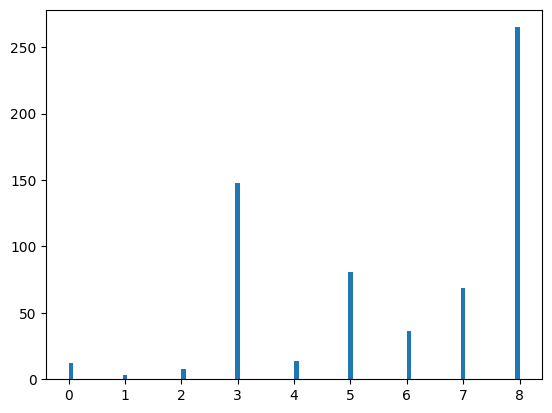

In [13]:
# print histogram of the number of images in each class
import matplotlib.pyplot as plt
plt.hist(train_dataset.targets, bins=100)
plt.show()


In [31]:
# subplot the images in each class for each client in the first task
import matplotlib.pyplot as plt
import numpy as np
folder_path = './histograms'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
for i in range(len(tasks)): # tasks 

    for j in range(10): # clients
        train_dataset.load_dataset(t= i, client=j) 
        heights , edges , _ = plt.hist(train_dataset.targets, bins=100)
        # title of the plot
        plt.title('task: ' + str(i) + ' client: ' + str(j) + ' total_images: ' + str(len(train_dataset.targets)))
        # x-axis label
        plt.xlabel('class')
        # y-axis label
        plt.ylabel('number of images')
        # save the figure for each client in the new folder called histogram
        # plt.savefig('histogram/task_' + str(i) + '_client_' + str(j) + '.png')
        # add the values of each bin on top of the bars
        for ii in range(len(heights)):
            if heights[ii] > 0:
                plt.text(edges[ii] + (edges[ii+1]-edges[ii])/2, heights[ii], str(int(heights[ii])),
                         ha='center', va='bottom')
    
        
        file_path = os.path.join(folder_path, f'task_{i}_client{j}_histogram.png')
        plt.savefig(file_path)

        # clear the figure
        plt.clf()


targets in dataloader [0 1 2 3 4 5 6 7 8 9]
targets in dataloader [0 1 2 3 4 5 6 7 8 9]
targets in dataloader [0 1 2 3 4 5 6 7 8]
targets in dataloader [0 1 2 3 4 5 6 7 8]
targets in dataloader [0 1 2 3 4 5 6 7 8]
targets in dataloader [0 1 2 3 4 5 6 7]
targets in dataloader [0 2 3 4 5 6 8 9]
targets in dataloader [1 2 4 6 7 8 9]
targets in dataloader [0 1 2 3 4 5 6]
targets in dataloader [0 1 2 3 4 5 6 7 8]
targets in dataloader [10 11 12 13 14]
targets in dataloader [10 11 12 13 14 15 16 17]
targets in dataloader [10 11 12 13 15]
targets in dataloader [10 11 12]
targets in dataloader [10 11 12 13 14 15 16 17 19]
targets in dataloader [10 11 12 13 14 15 16 17 18 19]
targets in dataloader [10 12 13 14 15 16 17 18 19]
targets in dataloader [10 11 12 15 16 17 18]
targets in dataloader [10 11 12 13 14 15 16 18 19]
targets in dataloader [10 11 12 13 14 15 16 17 18 19]
targets in dataloader [20 21 22 23 24 25 26 27 28 29]
targets in dataloader [20 21 22 23 24 25 26 27 29]
targets in dataloa

<Figure size 640x480 with 0 Axes>

In [18]:
test_dataset.load_dataset(t = 0, client=-1)

targets in dataloader [0 1 2 3 4 5 6 7 8 9]


In [19]:
np.unique(test_dataset.targets)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [20]:
len(test_dataset.targets)

1000

In [36]:
train_dataset.targets[0]

86

In [38]:
import matplotlib.pyplot as plt

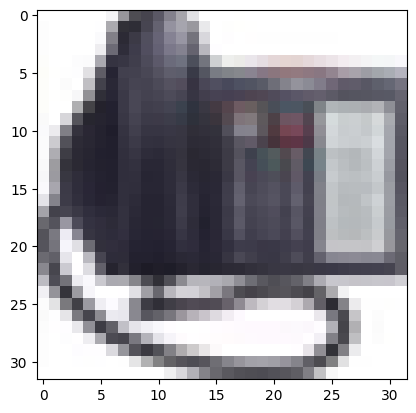

In [39]:
plt.imshow(train_dataset.data[0])

In [40]:
train_dataset.class_to_idx

{'apple': 0,
 'aquarium_fish': 1,
 'baby': 2,
 'bear': 3,
 'beaver': 4,
 'bed': 5,
 'bee': 6,
 'beetle': 7,
 'bicycle': 8,
 'bottle': 9,
 'bowl': 10,
 'boy': 11,
 'bridge': 12,
 'bus': 13,
 'butterfly': 14,
 'camel': 15,
 'can': 16,
 'castle': 17,
 'caterpillar': 18,
 'cattle': 19,
 'chair': 20,
 'chimpanzee': 21,
 'clock': 22,
 'cloud': 23,
 'cockroach': 24,
 'couch': 25,
 'crab': 26,
 'crocodile': 27,
 'cup': 28,
 'dinosaur': 29,
 'dolphin': 30,
 'elephant': 31,
 'flatfish': 32,
 'forest': 33,
 'fox': 34,
 'girl': 35,
 'hamster': 36,
 'house': 37,
 'kangaroo': 38,
 'keyboard': 39,
 'lamp': 40,
 'lawn_mower': 41,
 'leopard': 42,
 'lion': 43,
 'lizard': 44,
 'lobster': 45,
 'man': 46,
 'maple_tree': 47,
 'motorcycle': 48,
 'mountain': 49,
 'mouse': 50,
 'mushroom': 51,
 'oak_tree': 52,
 'orange': 53,
 'orchid': 54,
 'otter': 55,
 'palm_tree': 56,
 'pear': 57,
 'pickup_truck': 58,
 'pine_tree': 59,
 'plain': 60,
 'plate': 61,
 'poppy': 62,
 'porcupine': 63,
 'possum': 64,
 'rabbit': 65,

In [6]:
len(train_dataset.targets)

50000

In [7]:
train_dataset.load_dataset(t=0,client=0)

targets in dataloader [ 0  1 20 48 52 54 65 74 79 93]


In [12]:
train_dataset.tasks

[[20, 79, 93, 54, 52, 65, 0, 1, 48, 74],
 [44, 82, 35, 69, 91, 42, 33, 14, 5, 62],
 [32, 55, 96, 10, 21, 31, 90, 27, 28, 76],
 [80, 71, 66, 58, 23, 70, 60, 72, 17, 18],
 [45, 34, 11, 56, 84, 13, 41, 30, 24, 85],
 [51, 75, 37, 6, 53, 94, 95, 39, 47, 98],
 [36, 7, 50, 3, 63, 59, 9, 77, 64, 92],
 [86, 97, 61, 19, 25, 4, 16, 8, 46, 26],
 [2, 88, 29, 22, 87, 67, 68, 38, 83, 15],
 [12, 81, 43, 73, 78, 40, 99, 57, 89, 49]]

In [20]:
a = list(np.arange(0,10))
a

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [23]:
locs = np.isin(train_dataset.targets, train_dataset.tasks[0]).nonzero()[0]
locs

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [22]:
len(locs)

500

In [24]:
train_dataset_1 = torch.utils.data.Subset(train_dataset, locs[:int(len(train_dataset.targets)/2)])

In [32]:
t_loader = torch.utils.data.DataLoader(train_dataset_1,batch_size = 10)

In [34]:
len(t_loader) * 10

250

In [36]:
train_dataset_1.dataset.data

array([[[[250, 250, 248],
         [248, 249, 243],
         [247, 248, 239],
         ...,
         [250, 250, 246],
         [250, 250, 246],
         [249, 250, 246]],

        [[250, 251, 245],
         [248, 249, 238],
         [247, 247, 234],
         ...,
         [251, 251, 242],
         [251, 252, 243],
         [250, 251, 243]],

        [[251, 251, 244],
         [250, 248, 237],
         [250, 245, 233],
         ...,
         [250, 249, 238],
         [250, 249, 240],
         [250, 249, 242]],

        ...,

        [[221, 213, 191],
         [221, 206, 176],
         [225, 207, 181],
         ...,
         [199, 176, 134],
         [207, 193, 165],
         [233, 229, 226]],

        [[225, 223, 204],
         [227, 219, 196],
         [229, 216, 200],
         ...,
         [204, 185, 151],
         [212, 201, 180],
         [234, 232, 228]],

        [[233, 233, 226],
         [234, 232, 224],
         [235, 230, 225],
         ...,
         [219, 209, 194],
        

In [37]:
500//128

3

In [41]:
500/64


7.8125